In [1]:
import sys
#sys.path.insert(0,"/home/panhailin/software/source/git_hub/spateo-release/")
import spateo as st
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import cv2
import numpy as np
import pandas as pd

2025-06-18 19:00:43.496916: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-18 19:00:43.512029: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750244443.529461 2572128 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750244443.534831 2572128 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-18 19:00:43.592310: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.


In [2]:
plt.rcParams['figure.dpi'] = 50      
plt.rcParams['savefig.dpi'] = 300    

## unspliced reads 

In [3]:
### how to get the unspliced reads
# less A02384C3.lasso.test_0.gem.gz | grep -v "#" | grep -v "geneID" |awk 'BEGIN{print "geneID\tx\ty\tMIDCount\tEXONIC\tINTRONIC"} {print $1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$4-$5}'| gzip - > A02384C3.lasso.test_0.gem2.gz
# less A02384C4.lasso.test_0.gem.gz | grep -v "#" | grep -v "geneID" |awk 'BEGIN{print "geneID\tx\ty\tMIDCount\tEXONIC\tINTRONIC"} {print $1"\t"$2"\t"$3"\t"$4"\t"$5"\t"$4-$5}'| gzip - > A02384C4.lasso.test_0.gem2.gz
### 

# cell seg

## A02384C3

In [4]:
adata = st.io.read_bgi_agg(
    "./A02384C3.lasso.test_0.gem2.gz",
)
adata

|-----> Constructing count matrices.
|-----> <insert> __type to uns in AnnData Object.
|-----> <insert> pp to uns in AnnData Object.
|-----> <insert> spatial to uns in AnnData Object.


AnnData object with n_obs × n_vars = 10687 × 9454
    uns: '__type', 'pp', 'spatial'
    layers: 'spliced', 'unspliced'

In [5]:
# plt.imshow(adata.layers['unspliced'].A, vmax=5)
# plt.show()

In [6]:
cv2.imwrite("C3.intron.tif", adata.layers['unspliced'].A.astype(np.uint8))

True

In [7]:
# plt.imshow(adata.layers['unspliced'][2000:3000,4000:6000].A, vmax=5)
# plt.show()

In [8]:
# st.cs.segment_densities(adata, layer='unspliced', binsize=100, k=3, dk=3, distance_threshold=1, background=False)

In [9]:
# st.pl.imshow(adata, 'unspliced_bins', labels=True, show_cbar=True)

In [12]:
st.cs.score_and_mask_pixels(
    adata, 'unspliced', k=21, method='gauss', mk=3,
)
#st.pl.imshow(adata, 'unspliced_mask')

|-----> <select> unspliced layer in AnnData Object
|-----> Scoring pixels with gauss method.
|-----> <insert> unspliced_scores to layers in AnnData Object.
|-----> Applying threshold 0.142578125.
threshold: 0.142578125
|-----> <insert> unspliced_mask to layers in AnnData Object.


In [13]:
cv2.imwrite('C3.blur.tif', adata.layers['unspliced_scores'])

True

In [14]:
# plt.figure(dpi=50) 
# plt.imshow(adata.layers['unspliced'][2000:3000,2000:4000].A, vmax=5)
# plt.show()

In [15]:
cut_off = 0.20
# plt.imshow(adata.layers['unspliced_scores'][2000:3000,4000:6000], vmin=cut_off, vmax=cut_off+0.01)
# plt.show()

In [16]:
adata.layers['unspliced_mask'] = adata.layers['unspliced_scores'] >= cut_off

In [17]:
st.cs.find_peaks_with_erosion(adata, layer='unspliced_mask', out_layer='unspliced_markers')

|-----> <select> unspliced_mask layer in AnnData Object
|-----> Finding Watershed markers with iterative erosion.


Eroding: 113it [00:28,  3.92it/s]


|-----> <insert> unspliced_markers to layers in AnnData Object.


In [18]:
st.cs.watershed(adata, 'X', k=21, mask_layer='unspliced_mask', markers_layer='unspliced_markers', out_layer="unspliced_labels")

|-----> <select> X layer in AnnData Object
|-----> <select> unspliced_mask layer in AnnData Object
|-----> <select> unspliced_markers layer in AnnData Object
|-----> Running Watershed.
|-----? Some labels have area greater than 10000. If you are segmenting based on RNA, consider using `st.cs.label_connected_components` instead.
|-----> <insert> unspliced_labels to layers in AnnData Object.


In [19]:
st.cs.utils.filter_cell_labels_by_area(adata, "unspliced_labels", 20)

|-----> <select> unspliced_labels layer in AnnData Object
|-----> Cell number before filtering is 27284
|-----> <insert> unspliced_labels to layers in AnnData Object.
|-----> Cell number after filtering is 24160


In [20]:
# plt.imshow(adata.layers['unspliced_labels'])
# plt.show()


In [21]:
# plt.imshow(adata.layers['unspliced_labels'][2000:3000,2000:4000])
# plt.show()

In [22]:
st.cs.expand_labels(
    adata, 'unspliced_labels', distance=11, max_area=600, out_layer='unspliced_labels_expanded'
)

|-----> <select> unspliced_labels layer in AnnData Object
|-----> Expanding labels.


Expanding:   0%|          | 0/11 [00:00<?, ?it/s]2025-06-18 19:21:20.966811: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-18 19:21:20.966811: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-18 19:21:20.967380: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-18 19:21:20.983906: I tensorflow/core/util/port.cc:153] oneDN

|-----> <insert> unspliced_labels_expanded to layers in AnnData Object.


In [23]:
# plt.imshow(adata.layers['unspliced_labels_expanded'][2000:3000,2000:4000])
# plt.show()

In [24]:
st.cs.utils.get_cell_shape(adata, layer="unspliced_labels_expanded")

|-----> <select> unspliced_labels_expanded layer in AnnData Object
|-----> Set cell boundaries as value of 255
|-----> <insert> unspliced_labels_expanded_boundary to layers in AnnData Object.


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 12 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 23, 24, 25, 26, 27]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 12 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1,

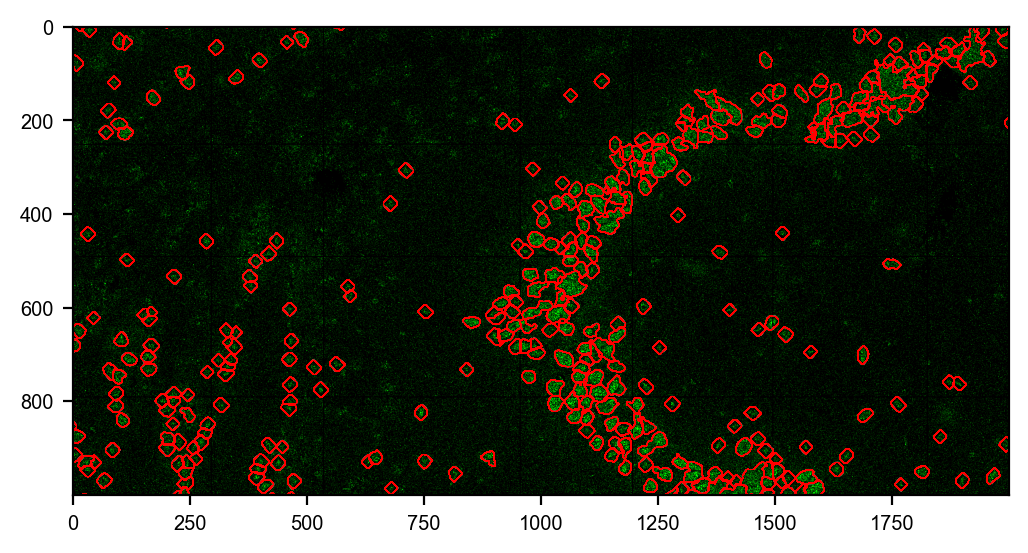

In [25]:
greenmap = clr.LinearSegmentedColormap.from_list('custom blue', [(0,'#000000FF'),(1,'#00FF00FF')], N=256)
redmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#FFFFFF00','#FF0000FF'], N=256)
tmp = adata[2000:3000,4000:6000]
fig, ax = plt.subplots(dpi=100)
ax.imshow(tmp.layers['unspliced'].A, cmap=greenmap, vmax=5)
ax.imshow(tmp.layers['unspliced_labels_expanded_boundary'], cmap=redmap, vmax=1)
plt.savefig('C3.zoom1.pdf')
plt.show()

In [26]:
cell_adata = st.io.read_bgi(
    './A02384C3.lasso.test_0.gem2.gz',
    segmentation_adata=adata,
    labels_layer='unspliced_labels_expanded',
)
cell_adata

|-----> <select> unspliced_labels_expanded layer in AnnData Object
|-----> Using labels provided with `segmentation_adata` and `labels_layer` arguments.
|-----> Constructing count matrices.
|-----> <insert> __type to uns in AnnData Object.
|-----> <insert> pp to uns in AnnData Object.
|-----> <insert> spatial to uns in AnnData Object.


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning:

Transforming to str index.



AnnData object with n_obs × n_vars = 24160 × 46488
    obs: 'area'
    uns: '__type', 'pp', 'spatial'
    obsm: 'spatial', 'contour', 'bbox'
    layers: 'spliced', 'unspliced'

In [27]:
adata.write('C3.cell_seg.h5ad')
cell_adata.write('C3.cell_gene.h5ad')

## A02384C4

In [28]:
adata = st.io.read_bgi_agg(
    "A02384C4.lasso.test_0.gem2.gz",
)
adata

|-----> Constructing count matrices.
|-----> <insert> __type to uns in AnnData Object.
|-----> <insert> pp to uns in AnnData Object.
|-----> <insert> spatial to uns in AnnData Object.


AnnData object with n_obs × n_vars = 11299 × 10889
    uns: '__type', 'pp', 'spatial'
    layers: 'spliced', 'unspliced'

In [29]:
# plt.imshow(adata.layers['unspliced'].A, vmax=5)
# plt.show()

In [30]:
cv2.imwrite("C4.intron.tif", adata.layers['unspliced'].A.astype(np.uint8))

True

In [31]:
# plt.imshow(adata.layers['unspliced'][2000:3000,4000:6000].A, vmax=5)
# plt.show()

In [32]:
st.cs.score_and_mask_pixels(
    adata, 'unspliced', k=21, method='gauss', mk=3,
)

|-----> <select> unspliced layer in AnnData Object
|-----> Scoring pixels with gauss method.
|-----> <insert> unspliced_scores to layers in AnnData Object.
|-----> Applying threshold 0.091796875.
threshold: 0.091796875
|-----> <insert> unspliced_mask to layers in AnnData Object.


In [33]:
cv2.imwrite('c4.blur.tif', adata.layers['unspliced_scores'])

True

In [34]:
# plt.figure(dpi=50) 
# plt.imshow(adata.layers['unspliced'][2000:3000,2000:4000].A, vmax=5)
# plt.show()

In [35]:
cut_off = 0.20
adata.layers['unspliced_mask'] = adata.layers['unspliced_scores'] >= cut_off

In [36]:
st.cs.find_peaks_with_erosion(adata, layer='unspliced_mask', out_layer='unspliced_markers')

|-----> <select> unspliced_mask layer in AnnData Object
|-----> Finding Watershed markers with iterative erosion.


Eroding: 92it [00:40,  2.27it/s]


|-----> <insert> unspliced_markers to layers in AnnData Object.


In [37]:
st.cs.watershed(adata, 'X', k=21, mask_layer='unspliced_mask', markers_layer='unspliced_markers', out_layer="unspliced_labels")

|-----> <select> X layer in AnnData Object
|-----> <select> unspliced_mask layer in AnnData Object
|-----> <select> unspliced_markers layer in AnnData Object
|-----> Running Watershed.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile t

In [38]:
st.cs.utils.filter_cell_labels_by_area(adata, "unspliced_labels", 20)

|-----> <select> unspliced_labels layer in AnnData Object
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Plea

In [39]:
# plt.imshow(adata.layers['unspliced_labels'])
# plt.show()

In [40]:
# plt.imshow(adata.layers['unspliced_labels'][2000:3000,2000:4000])
# plt.show()

In [41]:
st.cs.expand_labels(
    adata, 'unspliced_labels', distance=11, max_area=600, out_layer='unspliced_labels_expanded'
)

|-----> <select> unspliced_labels layer in AnnData Object
|-----> Expanding labels.


Expanding:   0%|          | 0/11 [00:00<?, ?it/s]2025-06-18 19:28:58.247359: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-18 19:28:58.300059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750246138.337303 2586351 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750246138.351119 2586351 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-18 19:28:58.417658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFl

|-----> <insert> unspliced_labels_expanded to layers in AnnData Object.


In [42]:
# plt.imshow(adata.layers['unspliced_labels_expanded'][2000:3000,2000:4000])
# plt.show()

In [43]:
st.cs.utils.get_cell_shape(adata, layer="unspliced_labels_expanded")

|-----> <select> unspliced_labels_expanded layer in AnnData Object
|-----> Set cell boundaries as value of 255
|-----> <insert> unspliced_labels_expanded_boundary to layers in AnnData Object.


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 12 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 23, 24, 25, 26, 27]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 12 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'five', 'four', 'nonmarkingreturn', 'one', 'seven', 'six', 'space', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1,

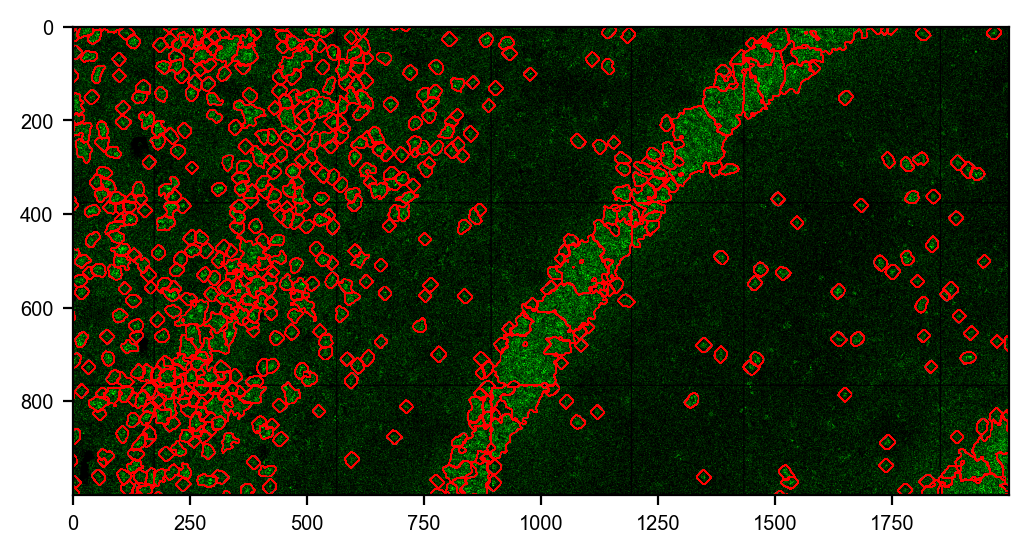

In [44]:
greenmap = clr.LinearSegmentedColormap.from_list('custom blue', [(0,'#000000FF'),(1,'#00FF00FF')], N=256)
redmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#FFFFFF00','#FF0000FF'], N=256)
tmp = adata[2000:3000,2000:4000]
fig, ax = plt.subplots(dpi=100)
ax.imshow(tmp.layers['unspliced'].A, cmap=greenmap, vmax=5)
ax.imshow(tmp.layers['unspliced_labels_expanded_boundary'], cmap=redmap, vmax=1)
plt.savefig('C4.zoom1.pdf')
plt.show()

In [45]:
greenmap = clr.LinearSegmentedColormap.from_list('custom blue', [(0,'#000000FF'),(1,'#00FF00FF')], N=256)
fig, ax = plt.subplots(dpi=100, figsize=[i/1000 for i in adata.shape][::-1])
ax.imshow(adata.layers['unspliced'].A, cmap=greenmap, vmax=5)
ax.imshow(adata.layers['unspliced_labels_expanded_boundary'], cmap=redmap, vmax=1)
plt.savefig('C4.cell_seg.pdf')
plt.close()

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 10 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'four', 'nonmarkingreturn', 'one', 'six', 'space', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 23, 25, 27]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 10 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'eight', 'four', 'nonmarkingreturn', 'one', 'six', 'space', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 23, 25, 27]
INFO:fontTo

In [46]:
cell_adata = st.io.read_bgi(
    'A02384C4.lasso.test_0.gem2.gz',
    segmentation_adata=adata,
    labels_layer='unspliced_labels_expanded',
)
cell_adata

|-----> <select> unspliced_labels_expanded layer in AnnData Object
|-----> Using labels provided with `segmentation_adata` and `labels_layer` arguments.
|-----> Constructing count matrices.
|-----> <insert> __type to uns in AnnData Object.
|-----> <insert> pp to uns in AnnData Object.
|-----> <insert> spatial to uns in AnnData Object.


/home/zhufan/anaconda3/envs/cellphonedb/lib/python3.12/site-packages/anndata/_core/anndata.py:183: ImplicitModificationWarning:

Transforming to str index.



AnnData object with n_obs × n_vars = 27088 × 48262
    obs: 'area'
    uns: '__type', 'pp', 'spatial'
    obsm: 'spatial', 'contour', 'bbox'
    layers: 'spliced', 'unspliced'

In [47]:
adata.write('C4.cell_seg.h5ad')
cell_adata.write('C4.cell_gene.h5ad')

alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed. Please install it using 'pip install alphashape'.
fastpd is not installed. Please compile the fastpd library.
alphashape is not installed